In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# import eHealthSystem as es

In [4]:
time = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 358, 442, 856, 1511, 1834, 1874, 1874, 1874, 1874, 1874, 2148, 2381, 3220, 3277, 3349, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 3769, 4580, 4580, 4580, 4580, 5544, 5794, 6842, 6842, 6842, 6842, 6842, 6842], dtype=np.float64)
# time = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 344, 619, 730, 730, 730, 746, 1004, 1004, 1004, 1181, 1181, 1181, 1181, 1181, 1533, 1687, 1770, 2289, 2333, 2333, 2423, 2423, 2423, 2423, 2423, 2539, 2539, 2703, 2703, 2703, 2703, 2703, 2761, 2761, 2800, 3156, 3156, 3156, 3156, 3591, 3667, 3667, 3667, 3667, 3667, 3667, 3667, 4034, 4107, 4122, 4416], dtype=np.float64)
time

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  358.,  442.,  856., 1511., 1834., 1874., 1874., 1874.,
       1874., 1874., 2148., 2381., 3220., 3277., 3349., 3769., 3769.,
       3769., 3769., 3769., 3769., 3769., 3769., 3769., 3769., 3769.,
       4580., 4580., 4580., 4580., 5544., 5794., 6842., 6842., 6842.,
       6842., 6842., 6842.])

In [5]:
np.arange(len(time))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [4]:
# time1 = es.lap_mechanism_gamma(time, 0, 0, 443, 0.1, 1)
# plt.figure(2)
# plt.plot(np.arange(len(time1), time1))

In [637]:
from scipy.stats import gamma

def lap_mechanism_gamma(original_data=[], loc=0, scale=0, people_num=0, epsil=0, test=0):
    def gammarnd(shape, scale):
        rnd_diff_list=[]

        for i in range(len(original_data)):
            r = gamma.rvs(shape, scale=scale, size = 2)
            rnd_diff_list.append(r[0]-r[1])
            
        return rnd_diff_list
    
    N = people_num
    slot_size = 66    #number of time period
    sensitivity, epsilon = 7000, epsil
    
    if test is 1:
        shape,scale = 1/N, (sensitivity/N)/(epsilon/slot_size)
    elif test is 2:
        group = 6
        shape,scale = 1/N, (sensitivity/(N/group))/(epsilon/(slot_size/group))
    
    gamma_noise_list = gammarnd(shape, scale)
    noisy_data = np.array(original_data) + np.array(gamma_noise_list)
    
    return noisy_data

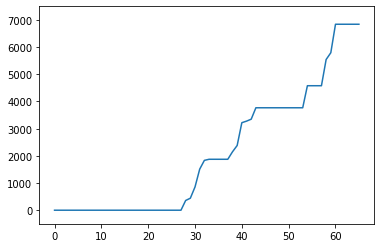

In [232]:
plt.ylim(-500, 7500)

plt.figure(1)
# plt.ylim(-50, 50)
plt.plot(np.arange(len(time)), time)

plt.show()

953.2721234832882 328.5168366086705 16.43221842988806


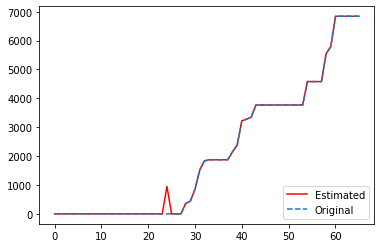

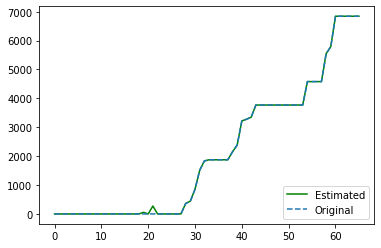

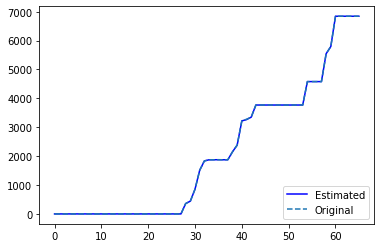

In [645]:
while True:
    time1 = lap_mechanism_gamma(time,0,0,443,0.1,1)
    time2 = lap_mechanism_gamma(time,0,0,443,0.5,1)
    time3 = lap_mechanism_gamma(time,0,0,443,1.0,1)

    n1 = sum(abs(time - time1))
    n2 = sum(abs(time - time2))
    n3 = sum(abs(time - time3))
    if n1 > n2 > n3 and n1 < 1500:
        print(n1, n2, n3)
        t = np.arange(len(time1))

        plt.figure(2)
        plt.plot(t, time1, 'r', label='Estimated')
        plt.plot(t, time, '--', label='Original')
        plt.legend(loc=4)

        plt.figure(3)
        plt.plot(t, time2, 'g', label='Estimated')
        plt.plot(t, time, '--', label='Original')
        plt.legend(loc=4)

        plt.figure(4)
        plt.plot(t, time3, 'b', label='Estimated')
        plt.plot(t, time, '--', label='Original')
        plt.legend(loc=4)

        plt.show()
        break

2270.800623513491 924.1941203286927 1.7665675553683013


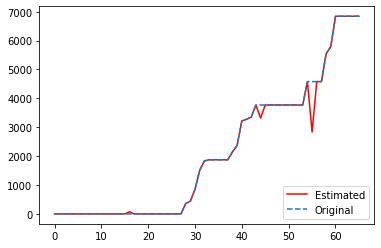

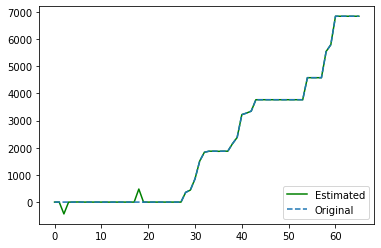

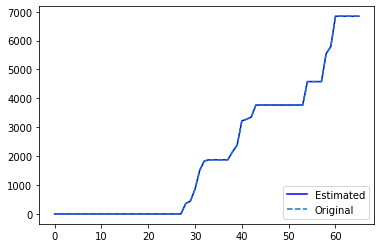

In [229]:
time1 = lap_mechanism_gamma(time,0,0,443,0.1,1)
time2 = lap_mechanism_gamma(time,0,0,443,0.5,1)
time3 = lap_mechanism_gamma(time,0,0,443,1.0,1)

print(sum(abs(time - time1)), sum(abs(time - time2)), sum(abs(time - time3)))

t = np.arange(len(time1))

res_dir = '/home/hp/jupyter/ljh/eHealthPython/result/'

plt.figure(2)
# plt.plot(t, time1, 'r', t, time, '--')
plt.plot(t, time1, 'r', label='Estimated')
plt.plot(t, time, '--', label='Original')
plt.legend(loc=4)
fig1 = res_dir+'실험결과1.png'
plt.savefig(fig1, dpi=300, pad_inches=0)


plt.figure(3)
# plt.plot(t, time2, 'g', t, time, '--')
plt.plot(t, time2, 'g', label='Estimated')
plt.plot(t, time, '--', label='Original')
plt.legend(loc=4)
fig2 = res_dir+'실험결과2.png'
plt.savefig(fig2, dpi=300, pad_inches=0)

plt.figure(4)
# plt.plot(t, time3, 'b', t, time, '--')
plt.plot(t, time3, 'b', label='Estimated')
plt.plot(t, time, '--', label='Original')
plt.legend(loc=4)
fig3 = res_dir+'실험결과3.png'
plt.savefig(fig3, dpi=300, pad_inches=0)

plt.show()

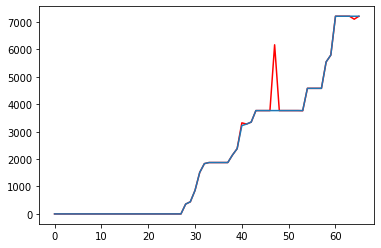

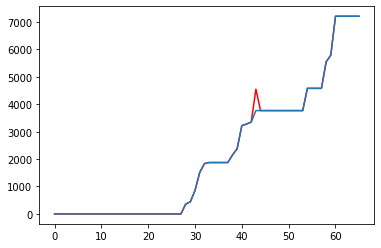

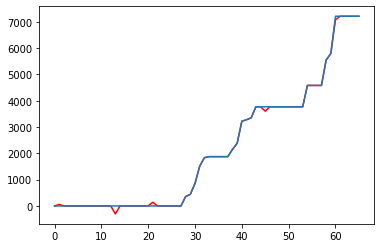

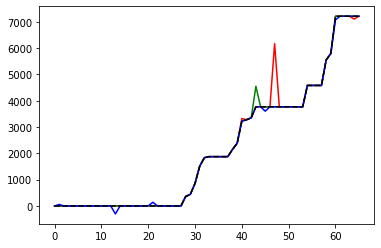

In [52]:
t = np.arange(len(time1))

plt.figure(2)
plt.plot(t, time1, 'r', t, time)

plt.figure(3)
plt.plot(t, time2, 'r', t, time)

plt.figure(4)
plt.plot(t, time3, 'r', t, time)
plt.show()

plt.plot(t, time1, 'r', t, time2, 'g', t, time3, 'b', t, time, 'k--')
plt.show()

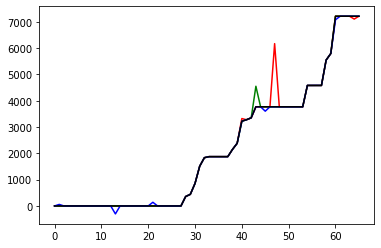

In [41]:
t = np.arange(len(time))
# plt.plot(t, time1, 'r--', t, time2, 'bs:', t, time3, 'g^-')
plt.plot(t, time1, 'r', t, time2, 'g', t, time3, 'b', t, time, 'k')
plt.show()

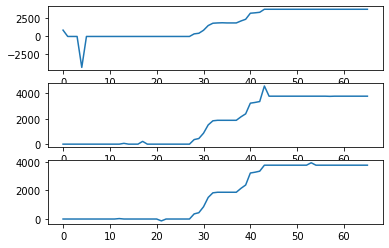

In [91]:
time1 = lap_mechanism_gamma(time, 0,0,443,0.1,1)
plt.subplot(3,1,1)
plt.plot(np.arange(len(time1)), time1)

time2 = lap_mechanism_gamma(time, 0,0,443,0.5,1)
plt.subplot(3,1,2)
plt.plot(np.arange(len(time2)), time2)


time3 = lap_mechanism_gamma(time, 0,0,443,1.0,1)
plt.subplot(3,1,3)
plt.plot(np.arange(len(time3)), time3)

plt.show()

In [6]:
dx_list = np.gradient(time)
print(dx_list)
tmp = []
for i in range(len(dx_list)-1):
    if i==0:
        tmp.append(dx_list[i])
    elif (dx_list[i-1]>0 and dx_list[i]>0 and dx_list[i+1]>0) or (dx_list[i-1]<0 and dx_list[i]<0 and dx_list[i+1]<0):
        print(dx_list[i-1], dx_list[i], dx_list[i+1])
    else:
        tmp.append(dx_list[i])
# print(len(tmp))
np.array(tmp)

[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.  179.  221.  249.  534.5 489.  181.5  20.    0.    0.
   0.  137.  253.5 536.  448.   64.5 246.  210.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0. ]
179.0 221.0 249.0
221.0 249.0 534.5
249.0 534.5 489.0
534.5 489.0 181.5
489.0 181.5 20.0
137.0 253.5 536.0
253.5 536.0 448.0
536.0 448.0 64.5
448.0 64.5 246.0
64.5 246.0 210.0


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 179.,  20.,   0.,   0.,   0., 137.,
       210.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [7]:
li1 = np.diff(time)
# li1
diff_list = [1 if i>0 else(-1 if i<0  else 0) for i in li1]

np.array(diff_list)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
stack = []
idx_list = []

for i in range(len(diff_list)):
    if i==0:
        stack.append(diff_list[i])
        idx_list.append(i)
    if diff_list[i] not in stack:
        stack.pop()
        stack.append(diff_list[i])
        idx_list.append(i)
    if i == len(diff_list)-1:
        idx_list.append(i+1)
        

idx_list1 = np.array(idx_list)
idx_list1
# print(len(idx_list1))

array([ 0, 27, 33, 37, 43, 65])

In [9]:
time1 = time.copy()
# time1

for i in range(len(time1)):
    if i not in idx_list1:
        time1[i] = np.nan
time1  

array([   0.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          0.,   nan,   nan,   nan,   nan,   nan, 1874.,   nan,   nan,
         nan, 1874.,   nan,   nan,   nan,   nan,   nan, 3769.,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan, 3769.])

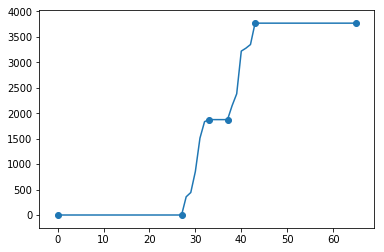

salient point 갯수 : 6
원본 데이터 갯수 : 66


In [10]:
plt.figure(2)
# plt.ylim(-50, 50)
plt.plot(np.arange(len(time)), time)
plt.scatter(np.arange(len(time1)), time1)
plt.show()

# print(len(time), len(time1))
print('salient point 갯수 :', len(idx_list1))
print('원본 데이터 갯수 :', len(time))

In [48]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 344, 619, 730, 730, 730, 746, 1004, 1004, 1004, 1181, 1181, 1181, 1181, 1181, 1533, 1687, 1770, 2289, 2333, 2333, 2423, 2423, 2423, 2423, 2423, 2539, 2539, 2703, 2703, 2703, 2703, 2703, 2761, 2761, 2800, 3156, 3156, 3156, 3156, 3591, 3667, 3667, 3667, 3667, 3667, 3667, 3667, 4034, 4107, 4122, 4416], dtype=np.float64)

def sp_generate(arr):
    diff = np.diff(arr)
    diff_list = [1 if i>0 else(-1 if i<0  else 0) for i in diff]
    
    stack = []
    idx_list = []
    res_list = []

    for i in range(len(diff_list)):
        if i==0:
            stack.append(diff_list[i])
            idx_list.append(i)
        if diff_list[i] not in stack:
            stack.pop()
            stack.append(diff_list[i])
            idx_list.append(i)
        if i == len(diff_list)-1:
            idx_list.append(i+1)

    idx_list = np.array(idx_list)
    for i in idx_list:
        res_list.append(arr[i])
    arr_copy = arr.copy()

    for i in range(len(arr_copy)):
        if i not in idx_list:
            arr_copy[i] = np.nan

    print('salient point 갯수 :', len(idx_list))
    print('원본 데이터 갯수 :', len(time))
    print('salient point ->', arr_copy)
    
sp_generate(arr)

salient point 갯수 : 23
원본 데이터 갯수 : 66
salient point -> [   0.   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan    0.   nan   nan  730.   nan  730.   nan 1004.   nan 1004.
 1181.   nan   nan   nan 1181.   nan   nan   nan   nan 2333. 2333. 2423.
   nan   nan   nan 2423. 2539. 2539. 2703.   nan   nan   nan 2703. 2761.
 2761.   nan 3156.   nan   nan 3156.   nan 3667.   nan   nan   nan   nan
   nan 3667.   nan   nan   nan 4416.]
